In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import tkinter as tk


from PIL import Image, ImageGrab
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Cargamos el Dataset

In [2]:
df = pd.read_csv("./data/mnist.csv", header=None)

num_columnas = len(df.columns)
nombres_columnas = ["label"]
nombres_columnas = nombres_columnas + [str(i) for i in range(num_columnas-1)]

df.columns=nombres_columnas

In [3]:
df.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 783
dtypes: int64(785)
memory usage: 359.3 MB


Distribucion del target

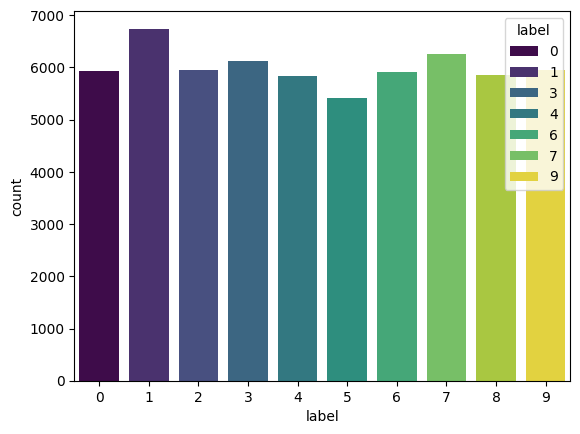

In [5]:
target = "label"
sns.countplot(df, x = target, hue = target, palette = "viridis");

In [6]:
df.iloc[:, 0:1].value_counts(normalize=True)

label
1        0.112367
7        0.104417
3        0.102183
2        0.099300
9        0.099150
0        0.098717
6        0.098633
8        0.097517
4        0.097367
5        0.090350
Name: proportion, dtype: float64

Separamos en train y test estratificando por el *target*

In [7]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify=df[target], random_state= 42)

In [8]:
train_set[target].value_counts(normalize=True)

label
1    0.112375
7    0.104417
3    0.102188
2    0.099292
9    0.099146
0    0.098708
6    0.098625
8    0.097521
4    0.097375
5    0.090354
Name: proportion, dtype: float64

In [9]:
test_set[target].value_counts(normalize=True)

label
1    0.112333
7    0.104417
3    0.102167
2    0.099333
9    0.099167
0    0.098750
6    0.098667
8    0.097500
4    0.097333
5    0.090333
Name: proportion, dtype: float64

Visualizamos algunos números

In [10]:
def plot_mnist_images(images, bck_white = False):
    """
    Función para mostrar imágenes del dataset MNIST.

    :param images: Array de numpy con múltiples imágenes, cada una de 784 elementos.
    """
    # Número de imágenes
    num_images = len(images)

    # Crear una cuadrícula de subplots
    cols = int(np.sqrt(num_images))
    rows = (num_images // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            # Convertir cada imagen de 784 elementos a un array 2D de 28x28
            img_matrix = images[i].reshape(28, 28)

            # Mostrar la imagen
            ax.imshow(img_matrix, cmap='gray' if not bck_white else "binary" )

            # Quitar los ejes
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

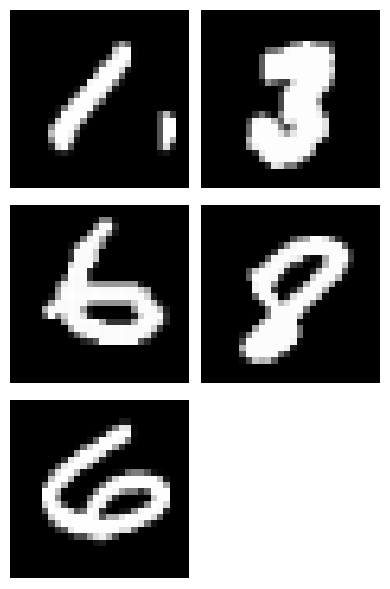

Números representados: [1 3 6 8 6]


In [11]:
plot_mnist_images(train_set.iloc[0:5, 1:].values);
print(f"Números representados: {train_set.iloc[0:5, 0:1].values.flatten()}")

Creamos los DataFrames X e y

In [12]:
X_train = train_set.iloc[:, 1:].copy()
y_train = train_set.iloc[:, 0:1].copy()

X_test = test_set.iloc[:, 1:].copy()
y_test = test_set.iloc[:, 0:1].copy()

In [13]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000, 1)


In [14]:
print(X_test.shape)
print(y_test.shape)

(12000, 784)
(12000, 1)


---------------------------

Optimizamos los hiperparametros de un modelo Random Forest

In [30]:
'''
rf_clf = RandomForestClassifier(random_state= 42)
'''

In [ ]:
'''
PROBAR
grid_rf = {
    "n_estimators": [100, 250], #El modelo tiene 100 por defecto
    "max_depth": [5, 10, 50, None], #El modelo tiene None por defecto
    "min_samples_split": [2, 5, 10], #El modelo tiene 2 por defecto
    "min_samples_leaf": [1, 2, 4], #El modelo tiene 1 por defecto
}
'''

In [31]:
'''
grid_rf = {
    "n_estimators": [250], #El modelo tiene 100 por defecto
    "max_depth": [50, 100, None], #El modelo tiene None por defecto
}

rf_grid = GridSearchCV(rf_clf, param_grid= grid_rf, cv=5, scoring= "accuracy", n_jobs=-1)

rf_grid.fit(X_train, y_train)
'''

c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 100, None], 'n_estimators': [250]},
             scoring='accuracy')

In [32]:
print(f"Los mejores hiperparámetros encontrados: {rf_grid.best_params_}")
print(f"El mejor score: {rf_grid.best_score_}")

Los mejores hiperparámetros encontrados: {'max_depth': 50, 'n_estimators': 250}
El mejor score: 0.9673958333333333


Lo exportamos para no tener que reentrenar

In [33]:
with open('./modelos/rf_optimizado.pkl', 'wb') as archivo:
    pickle.dump(rf_grid.best_estimator_, archivo)

------------------------------

Importamos el modelo exportado

In [15]:
with open('./modelos/rf_optimizado.pkl', 'rb') as archivo:
    rf_optimizado = pickle.load(archivo)

Predecimos y evaluamos los errores

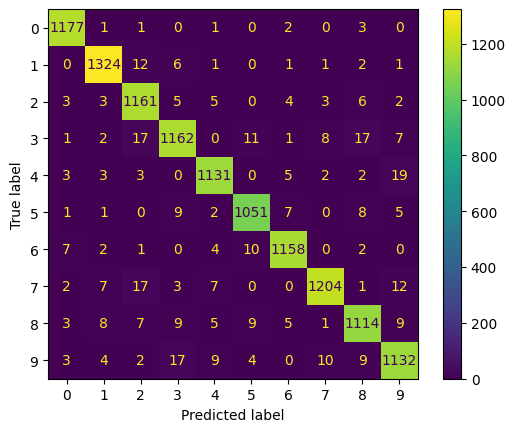

In [16]:
y_pred_test = rf_optimizado.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

In [17]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1185
           1       0.98      0.98      0.98      1348
           2       0.95      0.97      0.96      1192
           3       0.96      0.95      0.95      1226
           4       0.97      0.97      0.97      1168
           5       0.97      0.97      0.97      1084
           6       0.98      0.98      0.98      1184
           7       0.98      0.96      0.97      1253
           8       0.96      0.95      0.95      1170
           9       0.95      0.95      0.95      1190

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



Comprobamos manualmente los 5 primeros números del test

In [18]:
predicted_test = rf_optimizado.predict(X_test[0:5])
labels_test = y_test[0:5].values.flatten()

df_comparacion_test = pd.DataFrame({"prediccion_test":predicted_test, "label":labels_test})
df_comparacion_test.index.name = "Imagen"
df_comparacion_test.T

Imagen,0,1,2,3,4
prediccion_test,7,7,3,5,6
label,7,7,3,5,6


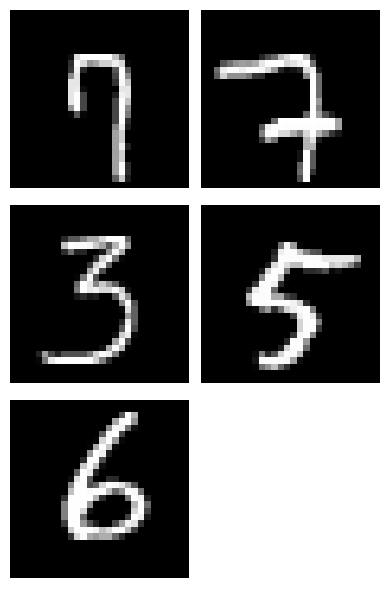

In [20]:
plot_mnist_images(X_test[0:5].values);

----------------------------------------

Predecimos con los números dibujados a mano con el ratón

In [21]:
ruta_directorio = "./data/test_manual/"
lista_archivos =os.listdir(ruta_directorio)
cantidad_archivos = len(lista_archivos)

lista_imagenes = []

for archivo in range(cantidad_archivos):
    
    # Cargar la imagen
    imagen = Image.open(ruta_directorio+lista_archivos[archivo])
    
    #Convertir la imagen a escala de grises
    imagen_gris = imagen.convert('L')
    
    # Obtener los valores de píxeles como una lista plana
    pixeles = list(imagen_gris.getdata())
    
    # obtenemos el label de cada numero segun el nombre de la imagen
    label = int(lista_archivos[archivo].split(".")[0])
    
    # Añadimos la lista de pixeles a la lista de imagenes
    lista_imagenes.append([label] + pixeles)

# Creamos el DataFrame con los píxeles de cada imagen
df_numeros_manual = pd.DataFrame(lista_imagenes, columns=["Label"]+[str(i) for i in range(28 * 28)])
df_numeros_manual
    

,Label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
1,0,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
2,0,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
3,1,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
4,1,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
5,1,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
6,2,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
7,2,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
8,2,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0
9,3,186,126,126,126,126,126,126,126,126,...,0,0,0,0,0,0,0,0,0,0


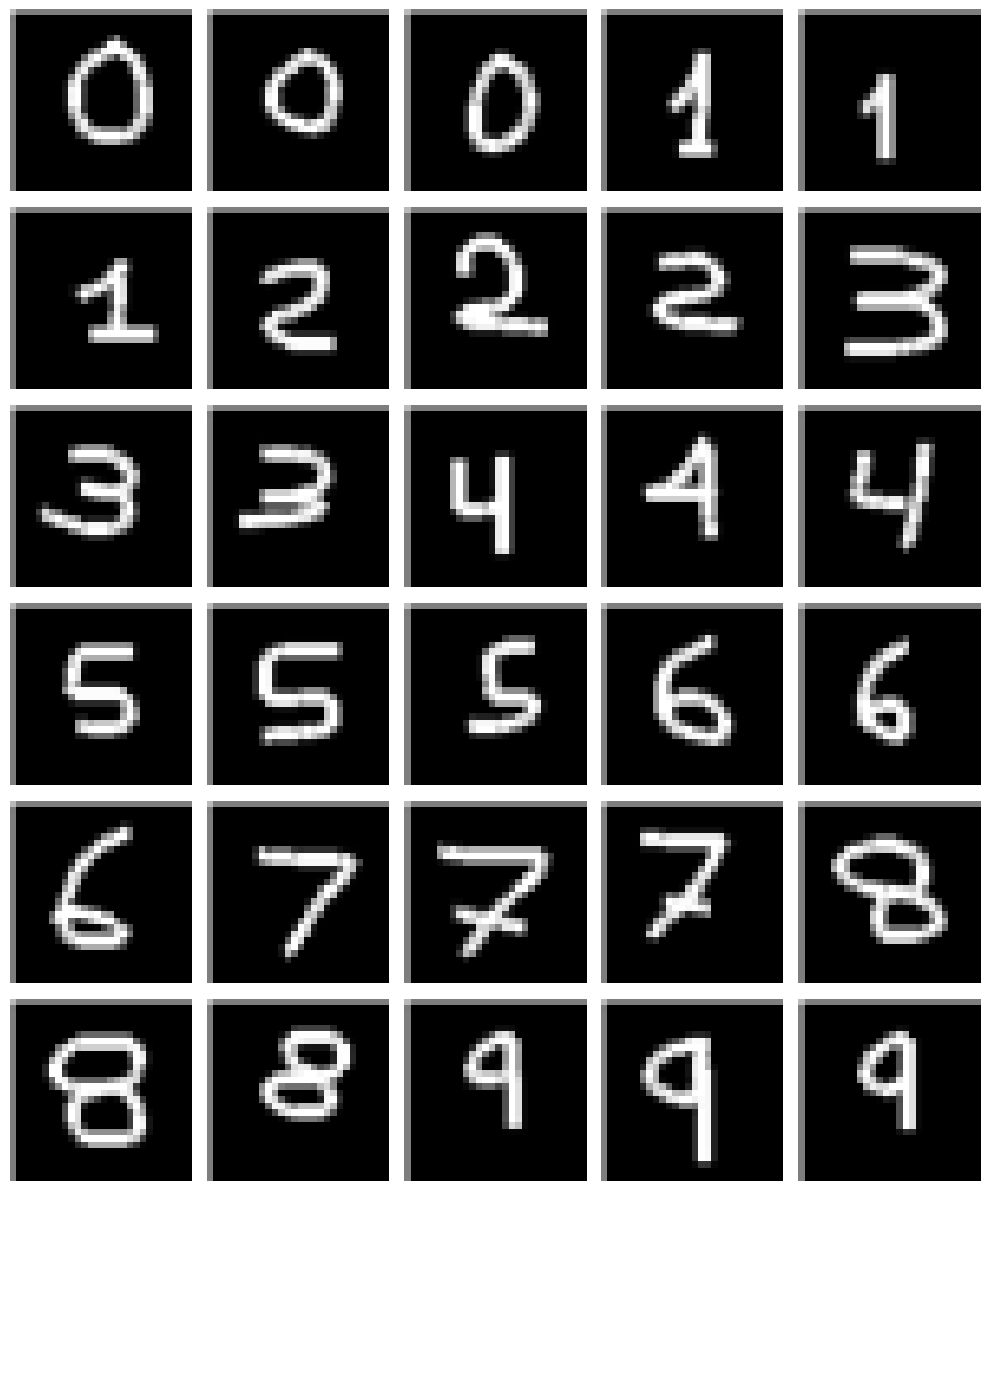

In [22]:
# Mostramos las imágenes a partir del DataFrame creado
plot_mnist_images(df_numeros_manual.iloc[:, 1:].values);

Predecimos y evaluamos los errores

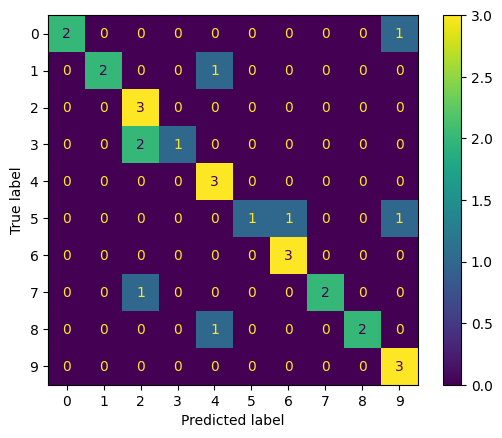

In [23]:
y_pred_prod = rf_optimizado.predict(df_numeros_manual.iloc[:, 1:])

ConfusionMatrixDisplay.from_predictions(df_numeros_manual.iloc[:, 0:1], y_pred_prod);

In [24]:
print(classification_report(df_numeros_manual.iloc[:, 0:1], y_pred_prod))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         3
           3       1.00      0.33      0.50         3
           4       0.60      1.00      0.75         3
           5       1.00      0.33      0.50         3
           6       0.75      1.00      0.86         3
           7       1.00      0.67      0.80         3
           8       1.00      0.67      0.80         3
           9       0.60      1.00      0.75         3

    accuracy                           0.73        30
   macro avg       0.84      0.73      0.72        30
weighted avg       0.85      0.73      0.72        30



Comprobamos manualmente

In [25]:
predicted_prod = rf_optimizado.predict(df_numeros_manual.iloc[:, 1:])
labels_prod = df_numeros_manual.iloc[:, 0:1].values.flatten()

df_comparacion_prod = pd.DataFrame({"prediccion_prod":predicted_prod, "label":labels_prod})
df_comparacion_prod.index.name = "Imagen"
df_comparacion_prod.T

Imagen,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
prediccion_prod,0,9,0,1,1,4,2,2,2,3,...,6,7,7,2,8,8,4,9,9,9
label,0,0,0,1,1,1,2,2,2,3,...,6,7,7,7,8,8,8,9,9,9


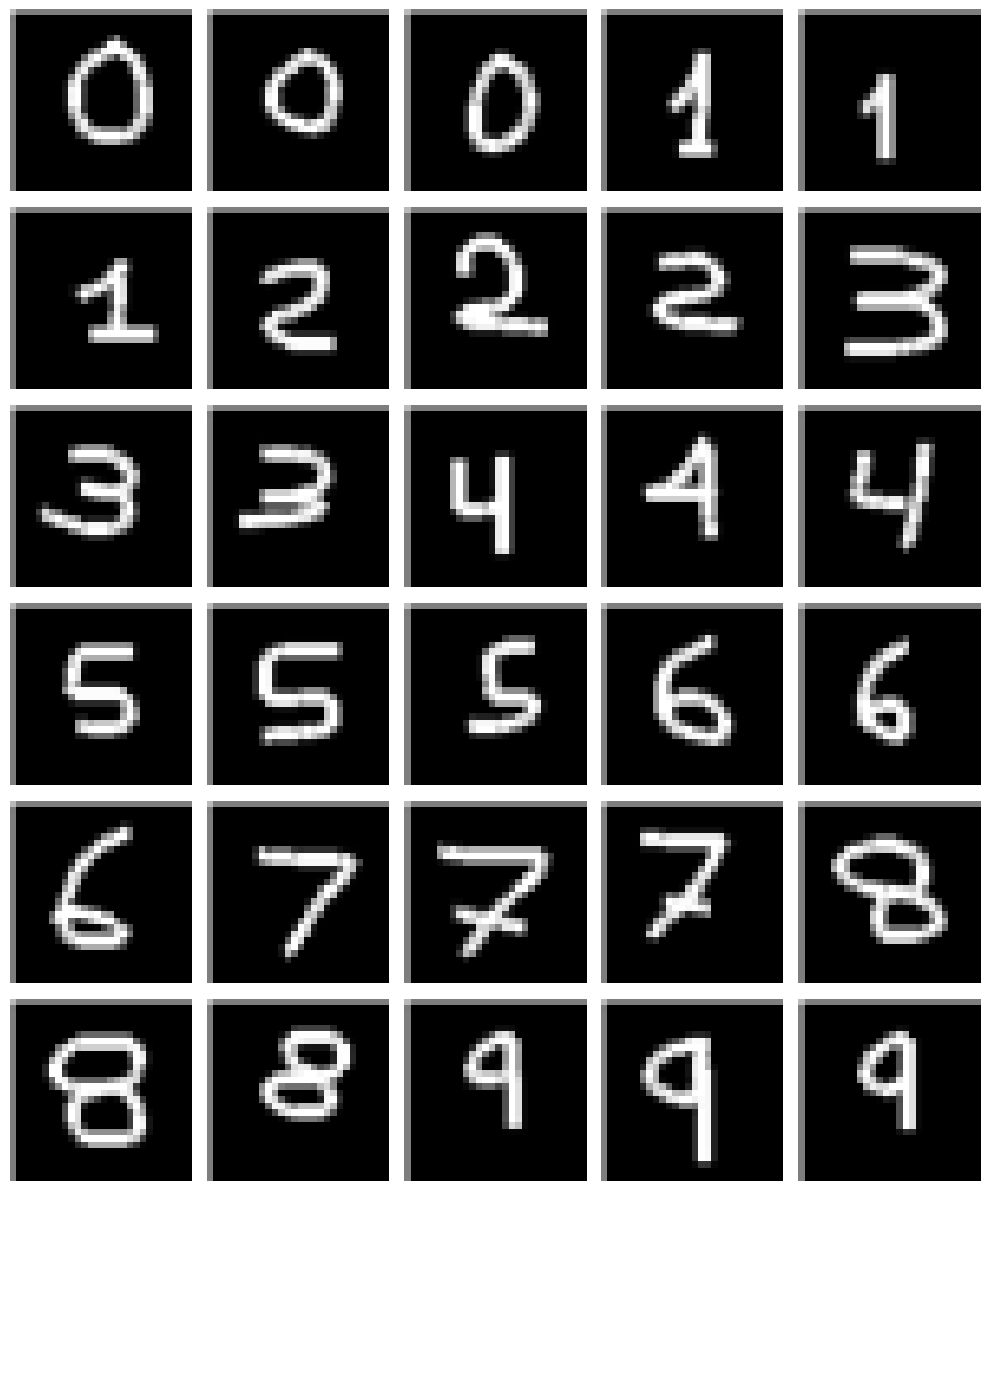

In [26]:
plot_mnist_images(df_numeros_manual.iloc[:, 1:].values);

Pedimos dibujar el numero

In [27]:
# Dimensiones de la ventana
width, height = 100, 100

# Dimensiones de la imagen
image_width = 28
image_height = 28

# Definir variables
drawing = False
last_x, last_y = None, None
radius = 4

# Función para iniciar el dibujo
def start_drawing(event):
    global drawing
    drawing = True

# Función para dibujar
def draw(event):
    global last_x, last_y

    if drawing:
        x, y = event.x, event.y

        if last_x is not None and last_y is not None:
            canvas.create_line(last_x, last_y, x, y, width=radius * 2, fill="white")

        last_x, last_y = x, y

# Función para detener el dibujo
def stop_drawing(event):
    global drawing, last_x, last_y
    drawing = False
    last_x, last_y = None, None

# Función para guardar la imagen
def save_image():
    filename = "numero.png"
    x0 = root.winfo_rootx() + canvas.winfo_x()
    y0 = root.winfo_rooty() + canvas.winfo_y()
    x1 = x0 + width
    y1 = y0 + height
    image = ImageGrab.grab().crop((x0, y0, x1, y1))
    image = image.resize((image_width, image_height))
    image.save(filename)
    print("Dibujo guardado:", filename)
    root.destroy()  # Cerrar la ventana después de guardar la imagen

# Función para limpiar la pantalla
def clear_canvas():
    canvas.delete("all")

# Crear la ventana y el lienzo para dibujar
root = tk.Tk()
root.title("Dibujar y guardar número")

canvas = tk.Canvas(root, width=width, height=height, bg="black")
canvas.pack()

# Asociar eventos con las funciones correspondientes
canvas.bind("<Button-1>", start_drawing)
canvas.bind("<B1-Motion>", draw)
canvas.bind("<ButtonRelease-1>", stop_drawing)

# Botones para guardar la imagen y limpiar la pantalla
save_button = tk.Button(root, text="Guardar", command=save_image)
save_button.pack(side=tk.LEFT)

clear_button = tk.Button(root, text="Limpiar", command=clear_canvas)
clear_button.pack(side=tk.LEFT)

root.mainloop()

Dibujo guardado: numero.png


Cargamos el dibujo y predecimos

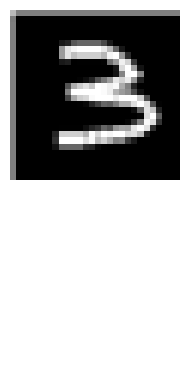

La predicción del modelo es: [3]


In [30]:
# Cargar la imagen
imagen = Image.open("numero.png")

# Convertir la imagen a escala de grises
imagen_gris = imagen.convert('L')

# Obtener los valores de píxeles como una lista plana
pixeles = list(imagen_gris.getdata())

# Crear un DataFrame de pandas con una sola fila y una columna para cada píxel
df_dibujo = pd.DataFrame([pixeles], columns=[str(i) for i in range(image_width * image_height)])

# Mostramos la imagen a partir del DataFrame creado
plot_mnist_images(df_dibujo[0:1].values);

# Mostramos la predicción del modelo
predicted = rf_optimizado.predict(df_dibujo[0:1])
print(f"La predicción del modelo es: {predicted}")